In [66]:
import pandas as pd
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
# TASK 1
df = pd.read_csv('Car_sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [68]:
df=df.drop(['Manufacturer','Model','Vehicle_type','Latest_Launch'], axis=1)
df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [69]:
df.isnull().sum()

Sales_in_thousands      0
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64

In [70]:
df = df.dropna(subset=['Length', 'Width', 'Price_in_thousands'])
df

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [71]:
df_std = df

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ['Length', 'Width', 'Price_in_thousands','Sales_in_thousands']
df_std[scale_columns] = std_scaler.fit_transform(df[scale_columns])

df_std.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,-0.532835,16.360,-0.411789,1.8,140.0,101.2,-1.116457,-1.110754,2.639,13.2,28.0,58.280150
1,-0.203323,19.875,0.070551,3.2,225.0,108.1,-0.247292,0.416076,3.517,17.2,25.0,91.370778
3,-0.655032,29.725,1.021248,3.5,210.0,114.6,0.071402,0.691650,3.850,18.0,22.0,91.389779
4,-0.481820,22.255,-0.237727,1.8,150.0,102.6,-0.855707,-0.693668,2.998,16.4,27.0,62.777639
5,-0.505538,23.555,0.458519,2.8,200.0,108.7,1.433095,0.349045,3.561,18.5,22.0,84.565105


In [78]:
# TASK 2
from sklearn.cluster import KMeans
df1 = df_std[scale_columns].iloc[:,1:3]
kmeans = KMeans(n_clusters=3, n_init=3).fit(df1)
centroids = kmeans.cluster_centers_
print('Centroids :\n ',centroids)

print('\nAttributes used for clustering model: ',scale_columns[1:3])

Centroids :
  [[-0.7637832  -0.46391145]
 [ 0.96163839 -0.03523367]
 [ 0.47243832  2.07971997]]

Attributes used for clustering model:  ['Width', 'Price_in_thousands']


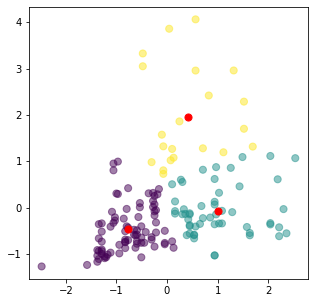

In [59]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(df1['Width'], df1['Price_in_thousands'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Centroids :
  [[-0.78366454 -0.47211032]
 [ 0.83812668 -0.05028956]
 [ 0.06514625  2.19476786]]


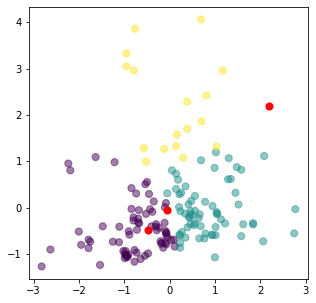

In [45]:
from sklearn.cluster import KMeans
df1 = df_std[['Length', 'Price_in_thousands']]
kmeans = KMeans(n_clusters=3, n_init=3).fit(df1)
centroids = kmeans.cluster_centers_
print('Centroids :\n ',centroids)
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(df1['Length'], df1['Price_in_thousands'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 1], c='red', s=50)
plt.show()

Centroids :
  [[ 1.05597923  1.13975143]
 [-1.09867147 -1.05722486]
 [-0.02010947 -0.11504758]]


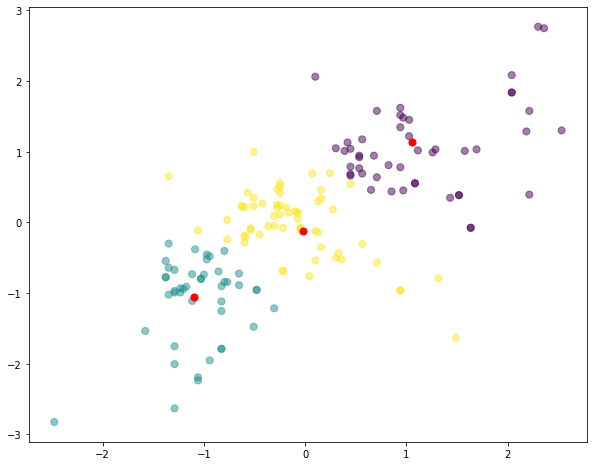

In [46]:
# TASK 3
from sklearn.cluster import KMeans
df1 = df_std[scale_columns].iloc[:,0:2]
kmeans = KMeans(n_clusters=3, n_init=3).fit(df1)
centroids = kmeans.cluster_centers_
print('Centroids :\n ',centroids)
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df1['Width'], df1['Length'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [47]:
clustered_df = df_std[scale_columns] 
clustered_df['Cluster'] = kmeans.labels_
clustered_df.head()

C:\Users\anura\AppData\Local\Temp/ipykernel_11624/4126367118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['Cluster'] = kmeans.labels_


,Length,Width,Price_in_thousands,Sales_in_thousands,Cluster
0,-1.110754,-1.116457,-0.411789,-0.532835,1
1,0.416076,-0.247292,0.070551,-0.203323,2
3,0.691650,0.071402,1.021248,-0.655032,2
4,-0.693668,-0.855707,-0.237727,-0.481820,1
5,0.349045,1.433095,0.458519,-0.505538,0


Centroids :
  [[-0.17393913 -0.38272364]
 [ 2.34868556 -0.61791455]
 [-0.59273383  1.58868944]]


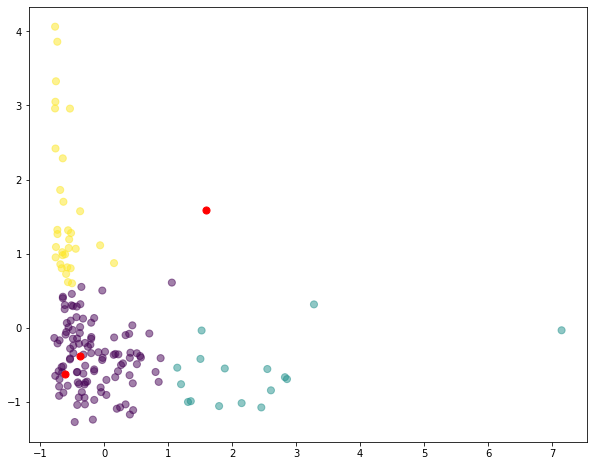

In [48]:
# TASK 4
from sklearn.cluster import KMeans
df1 = df_std[['Sales_in_thousands', 'Price_in_thousands']]
kmeans = KMeans(n_clusters=3, n_init=3).fit(df1)
centroids = kmeans.cluster_centers_
print('Centroids :\n ',centroids)
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df['Sales_in_thousands'], df1['Price_in_thousands'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 1], c='red', s=50)
plt.show()

Centroids :
  [[-0.55215741 -0.58165413]
 [ 0.94932327  1.00003692]]


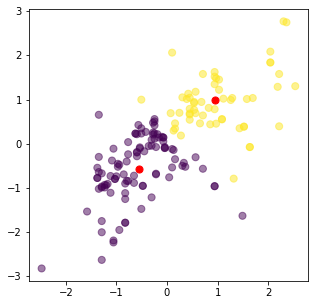

Centroids :
  [[ 1.93080309  2.21534351]
 [-0.04147627 -0.1304371 ]
 [ 0.86862781  0.89710945]
 [-1.09867147 -1.05722486]]


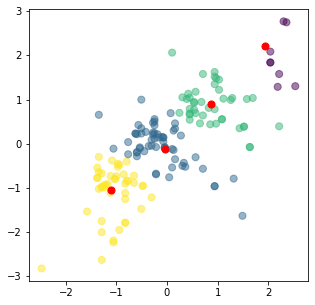

Centroids :
  [[ 0.97549999  0.76995378]
 [-0.78626462 -0.99352087]
 [ 1.93080309  2.21534351]
 [-0.32127095  1.32686341]
 [-2.07004973 -1.26421497]
 [ 0.05929068 -0.23001968]]


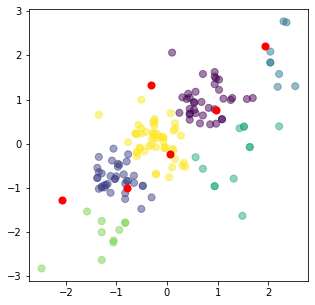

Centroids :
  [[ 0.72565183  0.48205152]
 [-0.80145687 -0.99976338]
 [ 0.13759547 -0.34763421]
 [ 1.49520142  0.80214509]
 [-0.69260448  0.48736009]
 [ 1.93080309  2.21534351]
 [-2.07004973 -1.26421497]
 [ 0.57248311  1.43102529]]


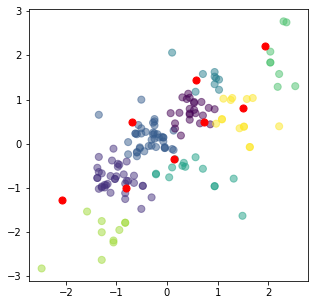

In [79]:
# TASK 5
k = [2,4,6,8]
for i in k:
    df1 = df_std[scale_columns].iloc[:,0:2]
    kmeans = KMeans(n_clusters=i, n_init=3).fit(df1)
    centroids = kmeans.cluster_centers_
    print('Centroids :\n ',centroids)
    fig, ax = plt.subplots(figsize=(5,5))
    plt.scatter(df1['Width'], df1['Length'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()